# Supervised Machine Learning: Regression

## Table of Contents

### 1. Import Data & Libraries

### 2. Data Cleaning

### 3. Data Prep for Regression Analysis

### 4. Regression Analysis

## 1. Import Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Show matplotlib visuals

%matplotlib inline

In [3]:
#Create a path

path = r'C:\Users\dyl41\Documents\Quality of Life Project'

In [4]:
#Import the dataset

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'QualityofLife2.csv'), index_col = False)

## 2. Data Cleaning

In [5]:
#Check the dataframe

df.head()

,Rank,Country,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife,Quality of Life Ranking
0,1,Australia,86,92,87,100,90,23,41,76,Best Quality of Life
1,2,San Marino,81,82,91,87,62,61,47,74,Best Quality of Life
2,3,Hong Kong,77,85,100,97,49,61,41,74,Best Quality of Life
3,4,Switzerland,91,99,93,99,34,44,46,74,Best Quality of Life
4,5,Macao,90,71,100,93,48,61,44,73,Best Quality of Life


In [6]:
#Check the dataframe shape

df.shape

(137, 11)

In [7]:
# Check for missing values

df.isnull().sum()

Rank                       0
Country                    0
Stability                  0
Rights                     0
Health                     0
Safety                     0
Climate                    0
Costs                      0
Popularity                 0
TotalQualityofLife         0
Quality of Life Ranking    0
dtype: int64

C:\Users\dyl41\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalQualityofLife', ylabel='Density'>

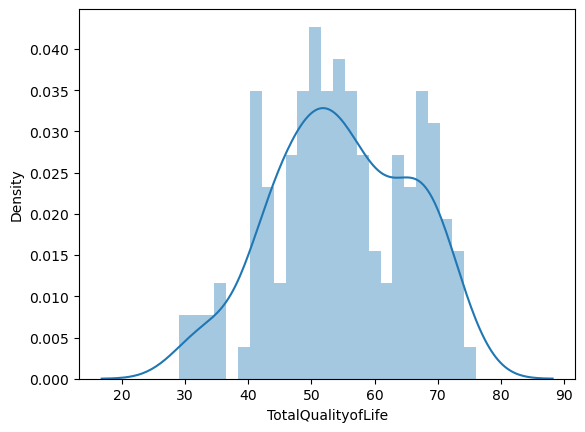

In [8]:
# Check for extreme values

sns.distplot(df['TotalQualityofLife'],bins = 25, kde = True)

In [9]:
# Check Mean

df ['TotalQualityofLife'].mean()

54.802919708029194

In [10]:
# Check median

df ['TotalQualityofLife'].median()

54.0

In [11]:
# Check max

df ['TotalQualityofLife'].max()

76

In [12]:
# Check max

df ['TotalQualityofLife'].min()

29

## 3. Data Prep for Regression Analysis

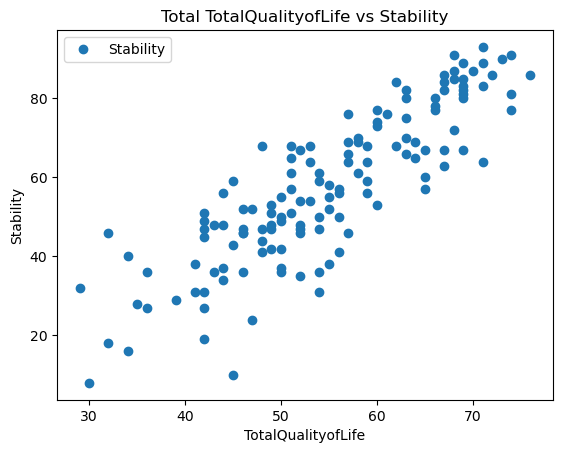

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'TotalQualityofLife', y='Stability',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total TotalQualityofLife vs Stability')  
plt.xlabel('TotalQualityofLife')  
plt.ylabel('Stability')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df ['TotalQualityofLife'].values.reshape(-1,1)
y = df ['Stability'].values.reshape(-1,1)

In [15]:
X

array([[76],
       [74],
       [74],
       [74],
       [73],
       [72],
       [71],
       [71],
       [71],
       [71],
       [70],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [68],
       [68],
       [68],
       [68],
       [67],
       [67],
       [67],
       [67],
       [67],
       [66],
       [66],
       [66],
       [65],
       [65],
       [65],
       [64],
       [64],
       [63],
       [63],
       [63],
       [63],
       [63],
       [62],
       [62],
       [61],
       [60],
       [60],
       [60],
       [60],
       [59],
       [59],
       [59],
       [59],
       [58],
       [58],
       [58],
       [57],
       [57],
       [57],
       [57],
       [57],
       [56],
       [56],
       [56],
       [56],
       [55],
       [55],
       [55],
       [55],
       [54],
       [54],
       [54],
       [54],
       [54],
       [54],
       [53],
       [53],
       [53],
       [52],

In [16]:
y

array([[86],
       [81],
       [77],
       [91],
       [90],
       [86],
       [93],
       [89],
       [83],
       [64],
       [87],
       [83],
       [80],
       [85],
       [82],
       [89],
       [81],
       [67],
       [91],
       [87],
       [72],
       [85],
       [86],
       [84],
       [67],
       [63],
       [82],
       [80],
       [78],
       [77],
       [67],
       [57],
       [60],
       [69],
       [65],
       [70],
       [66],
       [82],
       [75],
       [80],
       [84],
       [68],
       [76],
       [73],
       [53],
       [74],
       [77],
       [59],
       [68],
       [56],
       [64],
       [61],
       [70],
       [69],
       [46],
       [64],
       [76],
       [69],
       [66],
       [57],
       [41],
       [50],
       [56],
       [55],
       [38],
       [52],
       [58],
       [61],
       [59],
       [47],
       [36],
       [50],
       [31],
       [54],
       [64],
       [68],
       [47],

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

<B>Hypothesis: The higher the quality of life score, the higher the perceived stability of the country

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Apply model to x_test data to predict y values

y_predicted = regression.predict(X_test)

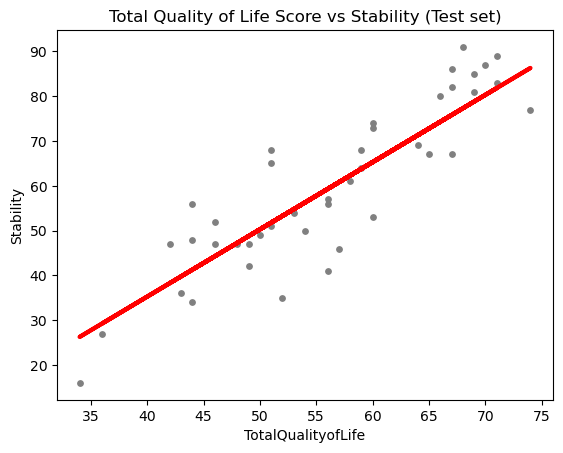

In [21]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Quality of Life Score vs Stability (Test set)')
plot_test.xlabel('TotalQualityofLife')
plot_test.ylabel('Stability')
plot_test.show()

<B> The red line indicates that the data fits the test set well, as the data points move in a linear direction with the line.

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.50125993]]
Mean squared error:  72.1028492384033
R2 score:  0.7802471629199434


In [24]:
y_predicted

array([[75.80029785],
       [81.80533757],
       [51.78013896],
       [53.28139889],
       [65.29147834],
       [51.78013896],
       [75.80029785],
       [63.79021841],
       [65.29147834],
       [75.80029785],
       [59.28643861],
       [41.27131945],
       [60.78769854],
       [74.29903792],
       [59.28643861],
       [41.27131945],
       [41.27131945],
       [38.26879959],
       [44.27383931],
       [51.78013896],
       [59.28643861],
       [77.30155778],
       [50.27887903],
       [71.29651806],
       [48.7776191 ],
       [63.79021841],
       [81.80533757],
       [78.80281771],
       [29.26124   ],
       [80.30407764],
       [86.30911737],
       [62.28895848],
       [47.27635917],
       [39.77005952],
       [72.79777799],
       [48.7776191 ],
       [54.78265882],
       [56.28391875],
       [65.29147834],
       [44.27383931],
       [26.25872014],
       [78.80281771]])

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,82,75.800298
1,83,81.805338
2,65,51.780139
3,35,53.281399
4,73,65.291478
5,68,51.780139
6,86,75.800298
7,64,63.790218
8,74,65.291478
9,67,75.800298


<B>The R2 score of 0.78 indicates that the regression analysis is a strong fit here, as it is much closer to 1 than 0, which would indicate a poor fit. The MSE of 72.10 seems high for this dataset, indicating that the trend line does not pass very closely with the datapoints. Finally, the slop of 1.50 indicates a positive relationship with the x and y variables, showing that when x rises, so does y. Based on the mixed results, I believe a linear regression model may not be a good fit for this particular analysis.

<B>Compare how the regression fits the training set

In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.50125993]]
Mean squared error:  109.17692352766937
R2 score:  0.7177901058765797


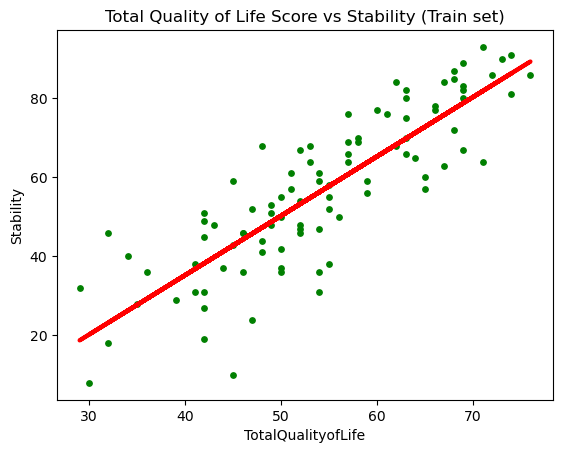

In [29]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Quality of Life Score vs Stability (Train set)')
plot_test.xlabel('TotalQualityofLife')
plot_test.ylabel('Stability')
plot_test.show()

<B>The comparison between the test and training sets revealed that the numbers are very similar, with the R2 score have a difference of -0.06, the MSE having a difference of -37.08, and the slope being the same. These statistics indicate that the model was not overfitted.

<B>This would also indicate that the relationship I am exploring is not purely linear.